<a href="https://colab.research.google.com/github/SondosAbdelhamid/data_science/blob/main/datascience_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing lib needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
#from keras.utils import to_categorical
#importing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import warnings
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\tensorflow\pyth

**Questions to ask of this data**

- combined with population data, how do different areas compare?
- what trends are there for accidents involving different road users eg motorcycles, peds, cyclists
- are road safety campaigns effective?
- likelihood of accidents for different groups / vehicles


In [ ]:
#loading Data
df1=pd.read_csv('Accidents_2018.csv')
df2=pd.read_csv('Casualties_2018.csv')
df3=pd.read_csv('Vehicles_2018.csv')

C:\Users\shahd\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 3 CSVs in this set. Accidents is the primary one and has references by Accident_Index to the casualties and vehicles tables. This might be better done as a database.

In [ ]:
#check data shape
print('Accidents_2018 data shape is :' , df1.shape)
print('Casualties_2018 data shape is :' ,df2.shape)
print('Vehicles_2018 data shape is :' ,df3.shape)

Accidents_2018 data shape is : (122635, 32)
Casualties_2018 data shape is : (160597, 16)
Vehicles_2018 data shape is : (226409, 23)


In [ ]:
#check data for df1
df1.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [ ]:
#check data for df2
df2.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [ ]:
#check data for df3
df3.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [ ]:
#merging all dataset together (merging df1 and df2)
dataFrame=pd.merge(df1,df2,on='Accident_Index')

In [ ]:
#check data shape after merging
dataFrame.shape

(140958, 47)

In [ ]:
#check data
dataFrame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010130027,523810.0,185730.0,-0.215455,51.556878,1,3,2,1,01/09/2018,...,6,3,0,0,0,0,0,3,1,6
1,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,6,3,0,0,0,2,0,11,1,3
2,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,1,3,0,0,0,2,0,11,1,3
3,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,0,0,0,9,1,4
4,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,2,0,0,9,1,4


In [ ]:
#merge 3rd data frame with our data
df=pd.merge(dataFrame,df3,on='Accident_Index')# where the Accident_Index values match in both DataFrames

In [ ]:
#checking final data size
df.shape

(270941, 69)

In [ ]:
df.head(15)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
5,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
6,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10
7,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,2,36,7,1591,1,7,4,1,4
8,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,1,18,4,125,1,3,3,1,3
9,2018010135270,533970.0,196400.0,-0.064912,51.650441,1,2,2,1,27/09/2018,...,6,2,21,5,1240,1,10,4,1,4


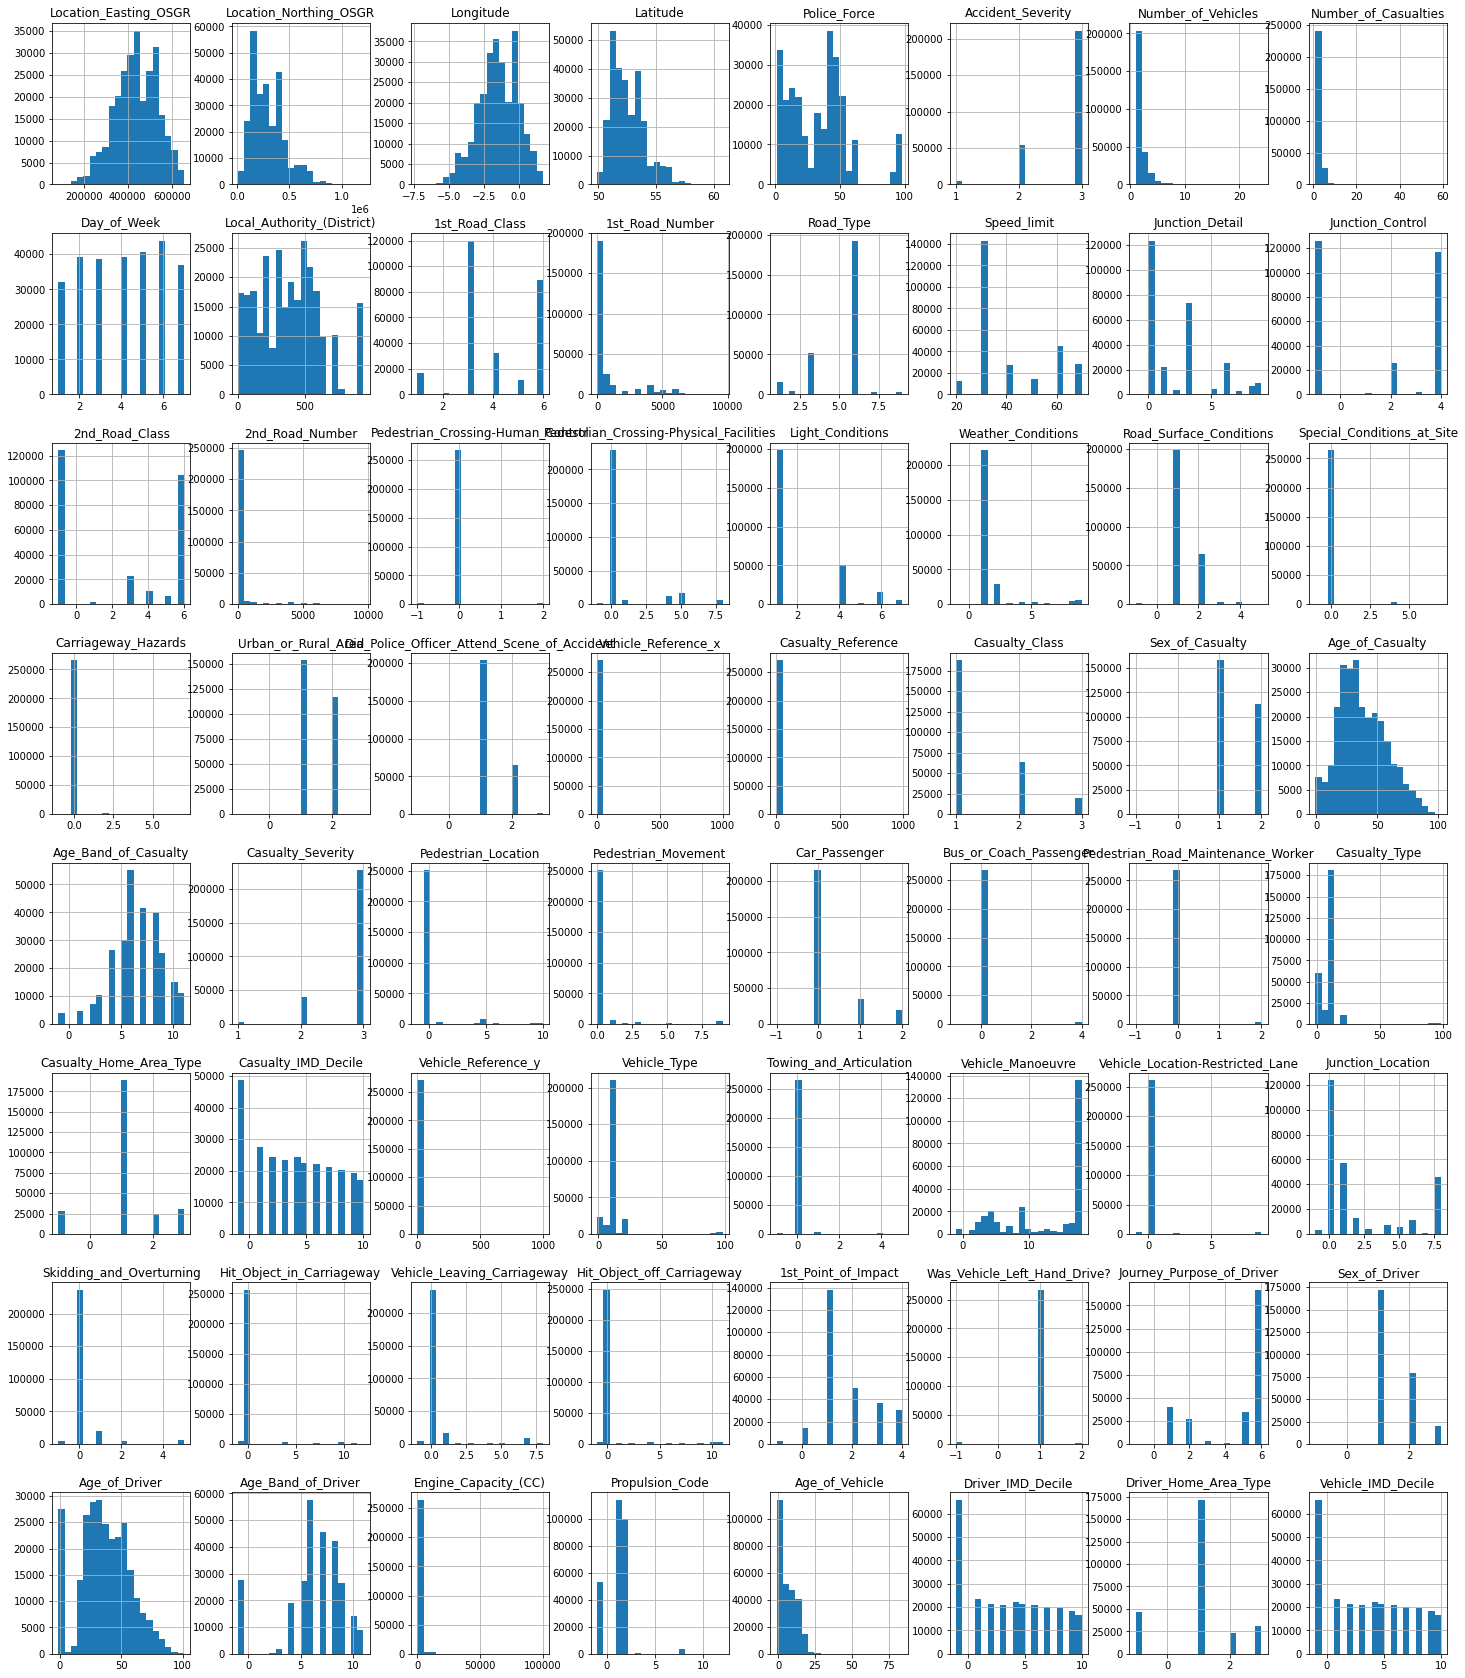

In [ ]:
df.hist(bins=20, figsize=(25,30))
plt.show()

In [ ]:
#checking full information about combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270941 entries, 0 to 270940
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270941 non-null  object 
 1   Location_Easting_OSGR                        270821 non-null  float64
 2   Location_Northing_OSGR                       270821 non-null  float64
 3   Longitude                                    270821 non-null  float64
 4   Latitude                                     270821 non-null  float64
 5   Police_Force                                 270941 non-null  int64  
 6   Accident_Severity                            270941 non-null  int64  
 7   Number_of_Vehicles                           270941 non-null  int64  
 8   Number_of_Casualties                         270941 non-null  int64  
 9   Date                                         270941 non-nul

In [ ]:
#checking all nulls in our data
df.isnull().sum()

Accident_Index              0
Location_Easting_OSGR     120
Location_Northing_OSGR    120
Longitude                 120
Latitude                  120
                         ... 
Propulsion_Code             0
Age_of_Vehicle              0
Driver_IMD_Decile           0
Driver_Home_Area_Type       0
Vehicle_IMD_Decile          0
Length: 69, dtype: int64

# the data has null columns like Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile    Driver_Home_Area_Type vehicle_IMD_Decile  and more

In [ ]:
#soring columns according to numbers of nulls
df.isnull().sum().sort_values(ascending = False).head(15)

LSOA_of_Accident_Location                  15762
Location_Easting_OSGR                        120
Location_Northing_OSGR                       120
Longitude                                    120
Latitude                                     120
Time                                          34
Vehicle_IMD_Decile                             0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Carriageway_Hazards                            0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
dtype: int64

In [ ]:
#dropping LSOA_of_Accident_Location columns as it has many nulls and it is not important
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)

In [ ]:
#dropping null cells only in below columns
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)

In [ ]:
##dropping null cells only in time columns
df.dropna(subset=['Time'],axis=0,inplace=True)

In [ ]:
#checking nulls again after our null dropping at all data ... now zero null
df.isnull().values.any()

False

In [ ]:
#checking all nulls value in our data
df.isnull().sum()

Accident_Index            0
Location_Easting_OSGR     0
Location_Northing_OSGR    0
Longitude                 0
Latitude                  0
                         ..
Propulsion_Code           0
Age_of_Vehicle            0
Driver_IMD_Decile         0
Driver_Home_Area_Type     0
Vehicle_IMD_Decile        0
Length: 68, dtype: int64

in our data we need the history of the accidant we cand take col date and take useful info from it like day month and year so we can respons on how often

In [ ]:
string='25/09/2018'
s1=string[6:10]
s2=string[0:2]
s3=string[3:5]

print('year : ',s1)
print('day : ',s2)
print('month : ',s3)

year :  2018
day :  25
month :  09


In [ ]:
def month(string):
    s=string[3:5]
    return s

In [ ]:
#25/09/2018
#creating function to add year column
def year(string):
    s=string[6:10]
    return int(s)
df['year']=df['Date'].apply(lambda x: year(x))

In [ ]:
#creating function to add month column
def month(string):
    s=string[3:5]
    return int(s)
df['Month']=df['Date'].apply(lambda x: month(x))

In [ ]:
#creating function to add day column
def day(string):
    s=string[:2]
    return int(s)
df['Day_of_month']=df['Date'].apply(lambda x: day(x))

we can create more features like hur from time

In [ ]:
#creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

data after new features

In [ ]:
#checking data size after adding 4 new columns
df.shape

(270787, 72)

In [ ]:
#checking data after adding 4 new columns
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,year,Month,Day_of_month,Hour
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,1499,1,-1,8,2,8,2018,9,25,12
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,1999,1,16,-1,-1,-1,2018,9,25,12
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,-1,-1,-1,-1,-1,-1,2018,9,7,11
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2967,2,1,1,1,1,2018,9,27,8
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,1339,1,8,10,1,10,2018,9,26,19


In [ ]:
#checking again data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270787 entries, 0 to 270940
Data columns (total 72 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270787 non-null  object 
 1   Location_Easting_OSGR                        270787 non-null  float64
 2   Location_Northing_OSGR                       270787 non-null  float64
 3   Longitude                                    270787 non-null  float64
 4   Latitude                                     270787 non-null  float64
 5   Police_Force                                 270787 non-null  int64  
 6   Accident_Severity                            270787 non-null  int64  
 7   Number_of_Vehicles                           270787 non-null  int64  
 8   Number_of_Casualties                         270787 non-null  int64  
 9   Date                                         270787 non-nul

In [ ]:
#renaming accident severity values
df['Accident_Severity']=df['Accident_Severity'].replace({1:'low' , 2 : 'medium' , 3 :'high'})

In [ ]:
#checking label vaules
df['Accident_Severity'].value_counts()

high      210795
medium     54656
low         5336
Name: Accident_Severity, dtype: int64

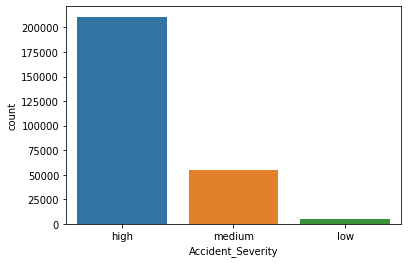

In [ ]:
sns.countplot(x = 'Accident_Severity',
              data = df,
              order = df.Accident_Severity.value_counts().index);

In [ ]:
#dropping not important columns
df.drop(['Local_Authority_(Highway)', 'Time', 'Date', 'Accident_Index'],axis=1,inplace=True)

In [ ]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270787 entries, 0 to 270940
Data columns (total 68 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        270787 non-null  float64
 1   Location_Northing_OSGR                       270787 non-null  float64
 2   Longitude                                    270787 non-null  float64
 3   Latitude                                     270787 non-null  float64
 4   Police_Force                                 270787 non-null  int64  
 5   Accident_Severity                            270787 non-null  object 
 6   Number_of_Vehicles                           270787 non-null  int64  
 7   Number_of_Casualties                         270787 non-null  int64  
 8   Day_of_Week                                  270787 non-null  int64  
 9   Local_Authority_(District)                   270787 non-nul

In [ ]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casu

In [ ]:
df['Accident_Severity'].value_counts()

high      210795
medium     54656
low         5336
Name: Accident_Severity, dtype: int64

In [ ]:
#blancing classes
df = df.groupby('Accident_Severity').head(10000)

In [ ]:
df.shape

(25336, 68)

In [ ]:
df['Accident_Severity'].value_counts()

high      10000
medium    10000
low        5336
Name: Accident_Severity, dtype: int64

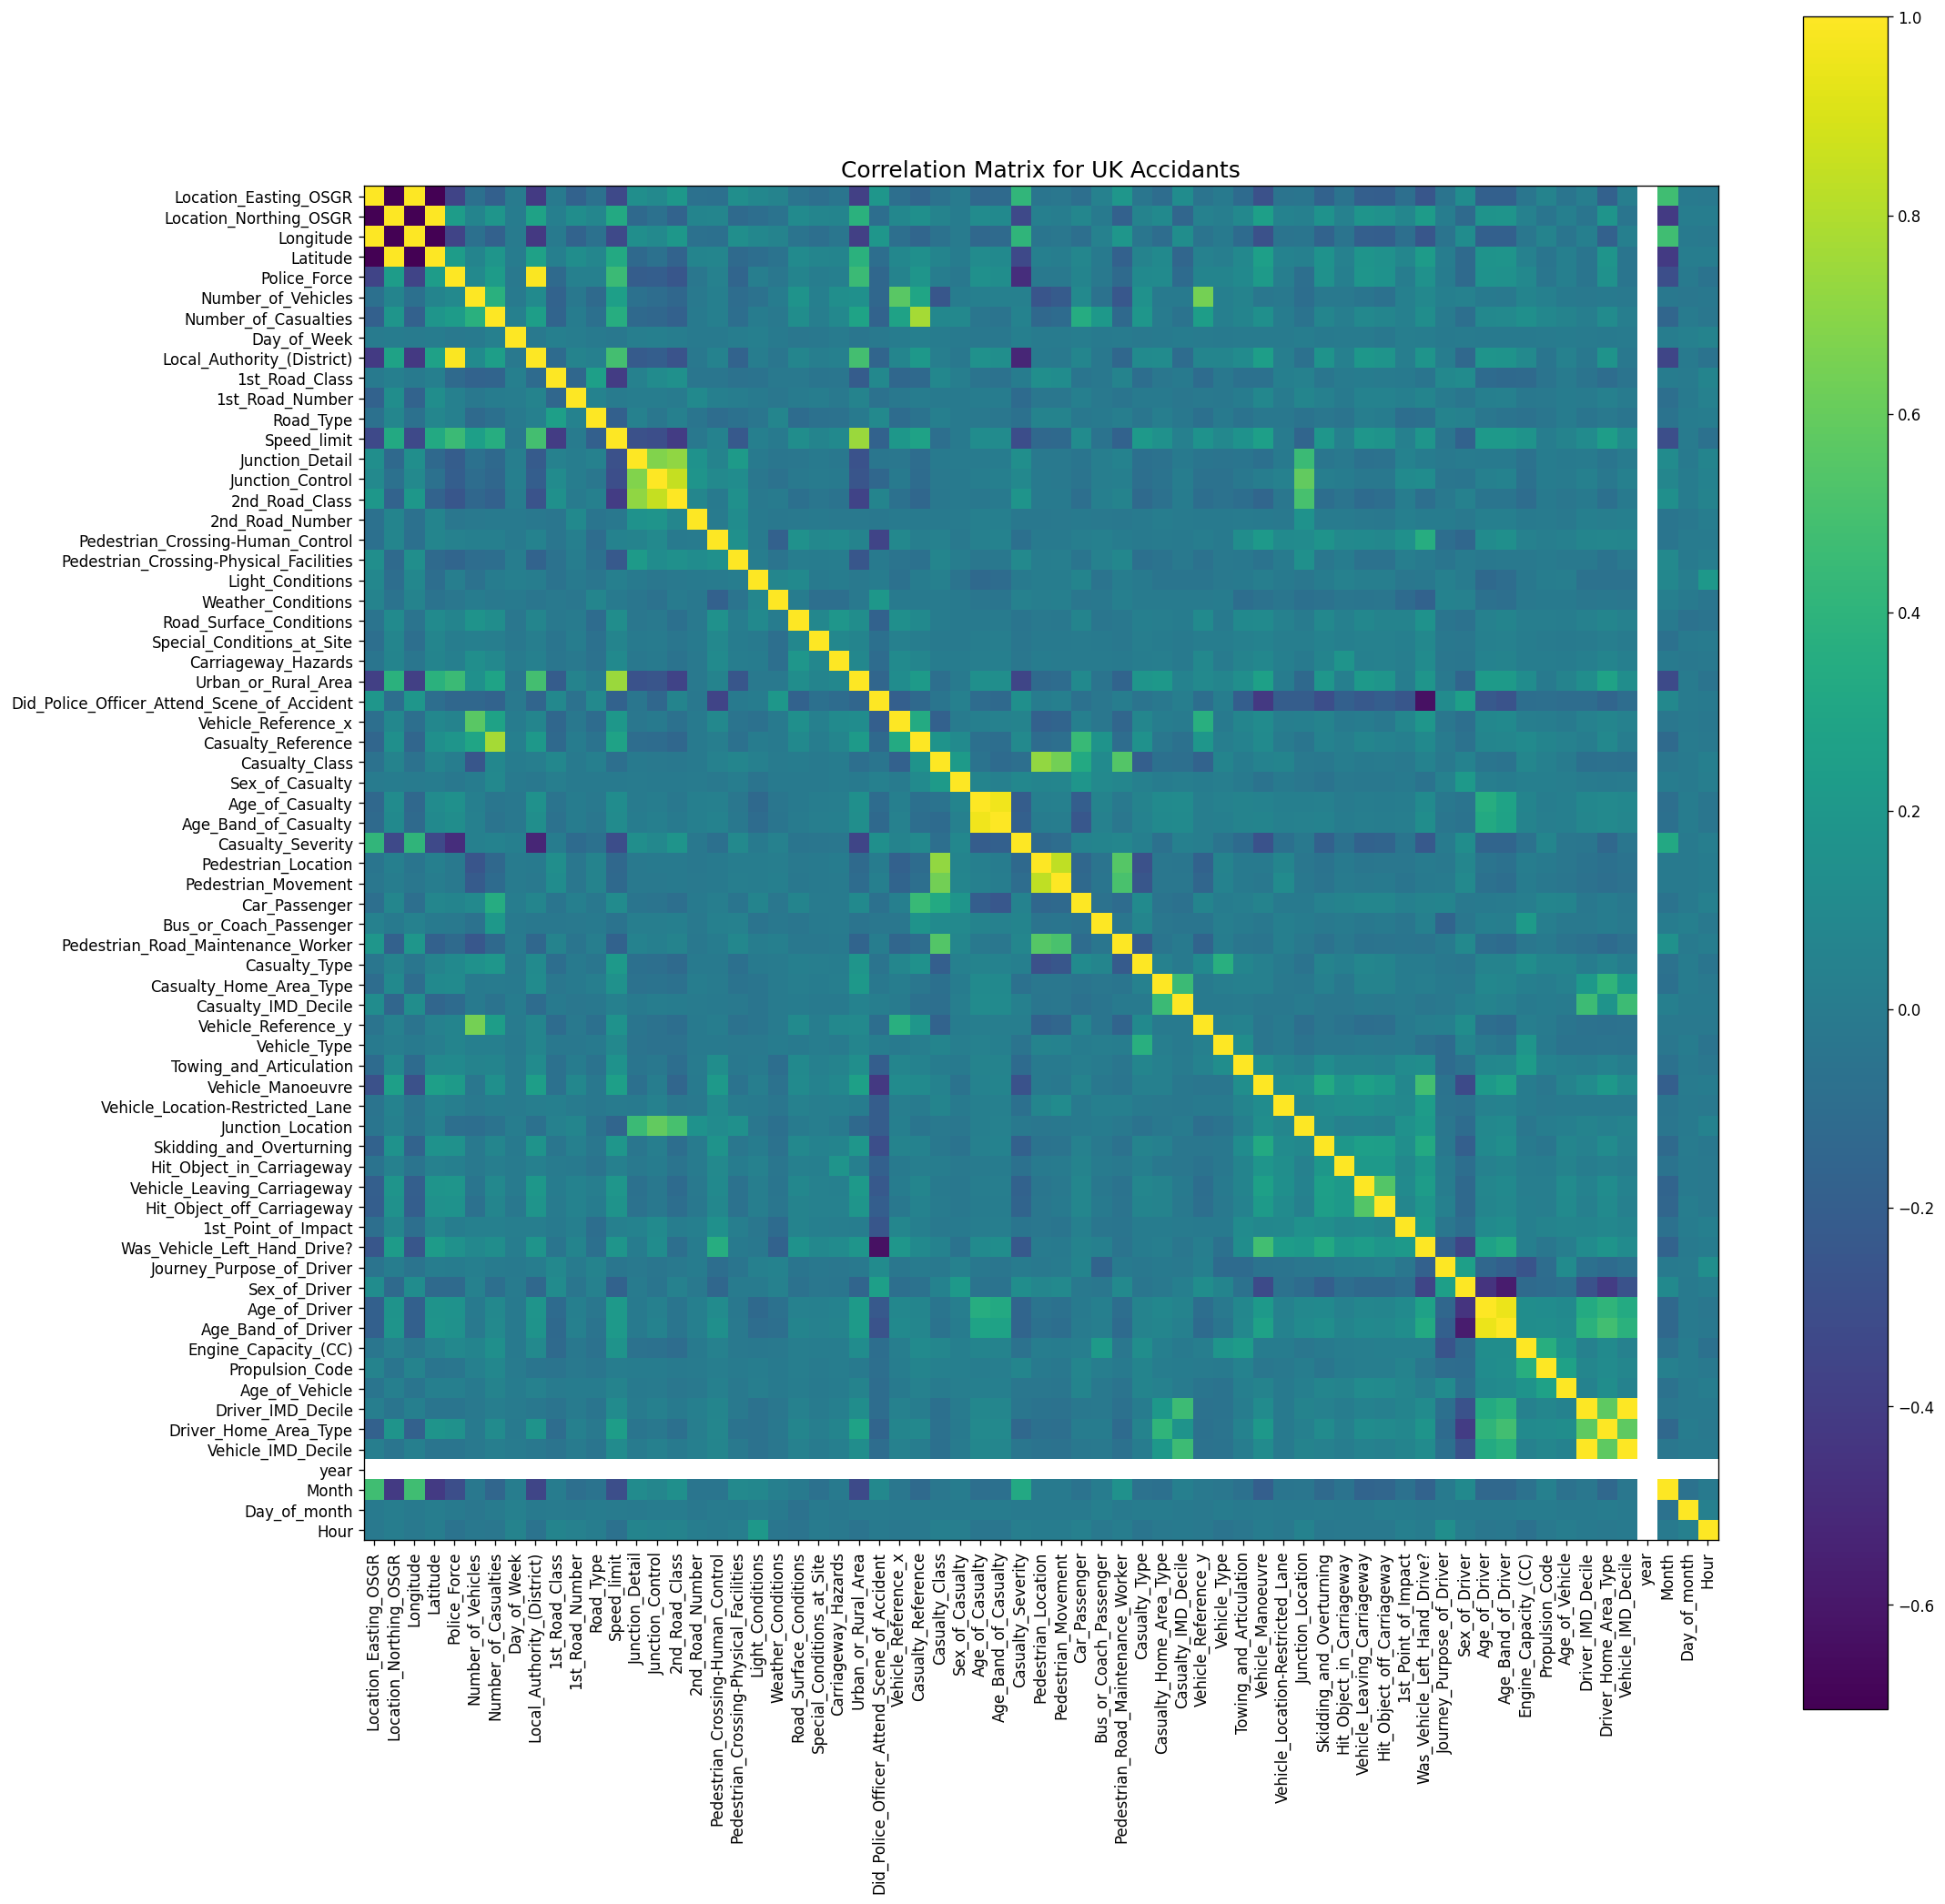

In [ ]:
corr = df.corr()
plt.figure(num=None, figsize=(20, 20), dpi=120, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix for UK Accidants', fontsize=15)
plt.show()

In [ ]:
# Change the index to the column 'Date'
df1.index = pd.DatetimeIndex(df1['Date'])

C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


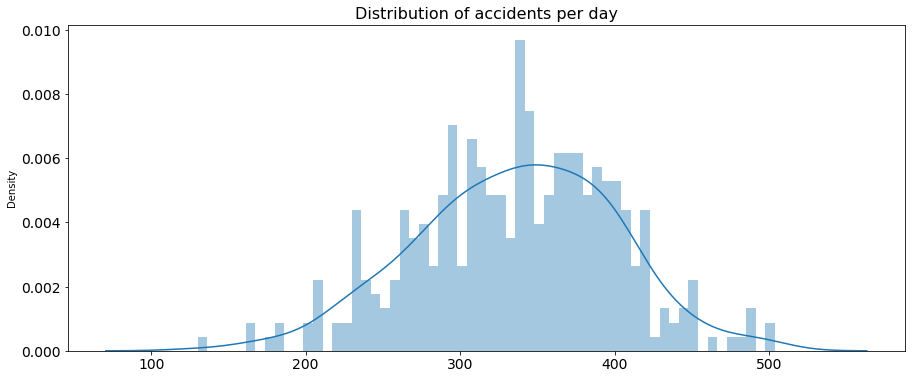

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Distribution of accidents per day', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df1.resample('D').size(), bins=60);

C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


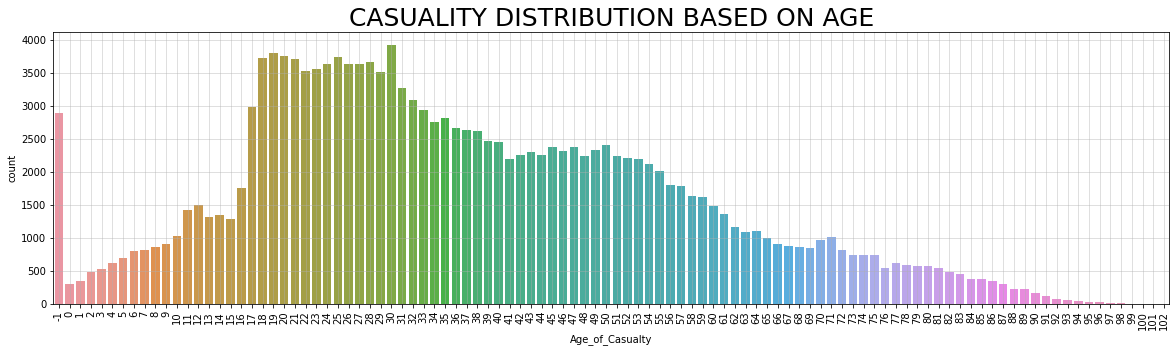

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot('Age_of_Casualty',data=df2)
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=25)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.show()

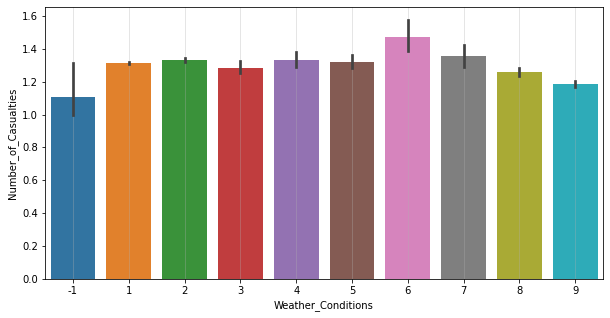

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(alpha=0.2)
sns.barplot(x='Weather_Conditions',y='Number_of_Casualties',data=df1)
plt.grid(alpha=0.4)
plt.show()

C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


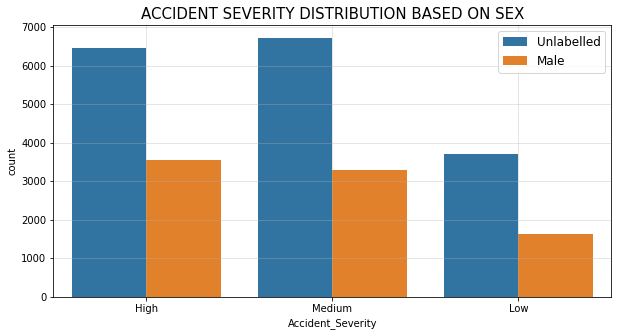

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Accident_Severity',hue='Sex_of_Casualty',data=df)
ax.set_xticklabels(['High','Medium','Low'])
plt.legend(['Unlabelled','Male','Female'],fontsize=12)
plt.title('ACCIDENT SEVERITY DISTRIBUTION BASED ON SEX', fontsize=15)
plt.grid(alpha=0.4)

<Figure size 720x360 with 0 Axes>

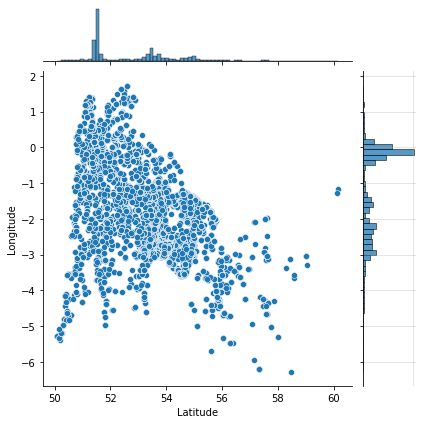

In [ ]:
#Scatter plot of Longitude/Latitude
plt.figure(figsize=(10,5))
sns.jointplot(x='Latitude',y='Longitude',kind = 'scatter',data=df)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.grid(alpha=0.4)

# Using DNN network

In [ ]:
data_copy=df.copy()

In [ ]:
data_copy.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,year,Month,Day_of_month,Hour
0,534140.0,168370.0,-0.073120,51.398512,1,high,2,1,3,20,...,1499,1,-1,8,2,8,2018,9,25,12
1,534140.0,168370.0,-0.073120,51.398512,1,high,2,1,3,20,...,1999,1,16,-1,-1,-1,2018,9,25,12
2,535780.0,185300.0,-0.043058,51.550261,1,high,1,1,6,4,...,-1,-1,-1,-1,-1,-1,2018,9,7,11
3,534120.0,192440.0,-0.064263,51.614820,1,high,1,1,5,32,...,2967,2,1,1,1,1,2018,9,27,8
4,529080.0,162590.0,-0.147913,51.347739,1,high,2,2,4,21,...,1339,1,8,10,1,10,2018,9,26,19


In [ ]:
#checking accident severity values
data_copy['Accident_Severity'].value_counts()

high      10000
medium    10000
low        5336
Name: Accident_Severity, dtype: int64

In [ ]:
#checking null vales again
data_copy.isnull().values.any()

False

In [ ]:
#splitting data to input and output
X=data_copy.drop('Accident_Severity',axis=1) #input
y_labels=data_copy['Accident_Severity']  #output(label)

In [ ]:
print(X.shape)
print(y_labels.shape)

(25336, 67)
(25336,)


In [ ]:
y_labels

0         high
1         high
2         high
3         high
4         high
          ... 
270714     low
270715     low
270894     low
270895     low
270900     low
Name: Accident_Severity, Length: 25336, dtype: object

>  one-hot encoded variables values will be 1 if the data point belongs to that category, and 0 otherwise.

In [ ]:
y_labels = pd.get_dummies(y_labels).values
print('Shape of label tensor:', y_labels.shape)

Shape of label tensor: (25336, 3)


In [ ]:
y_labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

> scalling data so be sure that data balanced

In [ ]:
#using standerscaler technique to scale all input data to be with the same scale
from sklearn.preprocessing import StandardScaler # importing module
scaler = StandardScaler()   #making function
X_scaled=scaler.fit_transform(X)    #scalling input data

In [ ]:
X_scaled

array([[ 0.8712709 , -0.85535825,  0.86012409, ...,  0.14585024,
         1.01083226, -0.29693589],
       [ 0.8712709 , -0.85535825,  0.86012409, ...,  0.14585024,
         1.01083226, -0.29693589],
       [ 0.8902991 , -0.74220139,  0.88396415, ...,  0.14585024,
        -0.97843161, -0.47559527],
       ...,
       [-1.75391362,  2.04991244, -1.8201708 , ...,  0.14585024,
         1.12134691,  0.23904224],
       [-1.75391362,  2.04991244, -1.8201708 , ...,  0.14585024,
         1.12134691,  0.23904224],
       [-1.54842061,  1.83851029, -1.59233968, ...,  0.46358557,
         0.9003176 ,  1.48965788]])

In [ ]:
#splitting all data to train data and test data
from sklearn.model_selection import train_test_split   # importing module
#data splitting with 80% train and 20% test and shuffle it
X, X_test, y, y_test= train_test_split(X_scaled,y_labels,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.5,random_state=0)


In [ ]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_val.shape : ',X_train.shape)
print(' y_val.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (8867, 67)
 y_train.shape :  (8867, 3)
 X_val.shape :  (8867, 67)
 y_val.shape :  (8867, 3)
 X_test.shape :  (7601, 67)
 y_test.shape :  (7601, 3)


In [ ]:
#classification

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=67, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               34816     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 166,915
Trainable params: 166,915
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train, epochs=10, verbose=1,validation_data=(X_val, y_val))

Train on 8867 samples, validate on 8868 samples
Epoch 1/10
8867/8867 [==============================] - 3s 328us/step - loss: 0.3018 - acc: 0.8895 - val_loss: 0.1517 - val_acc: 0.9551
Epoch 2/10
8867/8867 [==============================] - 2s 216us/step - loss: 0.1525 - acc: 0.9497 - val_loss: 0.1350 - val_acc: 0.9628
Epoch 3/10
8867/8867 [==============================] - 2s 215us/step - loss: 0.1227 - acc: 0.9629 - val_loss: 0.1100 - val_acc: 0.9696
Epoch 4/10
8867/8867 [==============================] - 2s 222us/step - loss: 0.0991 - acc: 0.9696 - val_loss: 0.1027 - val_acc: 0.9705
Epoch 5/10
8867/8867 [==============================] - 2s 232us/step - loss: 0.0875 - acc: 0.9711 - val_loss: 0.1033 - val_acc: 0.9721
Epoch 6/10
8867/8867 [==============================] - 2s 229us/step - loss: 0.0752 - acc: 0.9773 - val_loss: 0.1001 - val_acc: 0.9716
Epoch 7/10
8867/8867 [==============================] - 2s 221us/step - loss: 0.0734 - acc: 0.9768 - val_loss: 0.1013 - val_acc: 0.9745


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['low' , 'medium' , 'high']
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

#Y_pred = np.where(Y_pred>0.5, 1, 0) #for 2 classes only
print('Confusion Matrix')
cm = confusion_matrix(y_test, Y_pred)
print(cm)
print('Classification Report')
print(classification_report(y_test, Y_pred))

Confusion Matrix
[[3007    0    7]
 [   1 1541   97]
 [  92   10 2846]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3014
           1       0.99      0.94      0.97      1639
           2       0.96      0.97      0.97      2948

    accuracy                           0.97      7601
   macro avg       0.98      0.97      0.97      7601
weighted avg       0.97      0.97      0.97      7601



In [ ]:
#regression  why linear predicting a continuous numerical value

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_predicted = model.predict(X_val)

predicted_value = model.predict(X_train)
print("Predicted value for new data:", predicted_value[0])


Predicted value for new data: [ 0.77039187 -0.04884154  0.27844967]


## Cross-Validation Using K-Fold

In [ ]:
y = y_labels[:, -1]  # Select the last column (assuming target variable is there)
y_flat = y.flatten()

In [ ]:
print(X_scaled.shape)
print(y_labels.shape)

(25336, 67)
(25336, 3)


C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\shahd\anaconda3\envs\neural\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarni

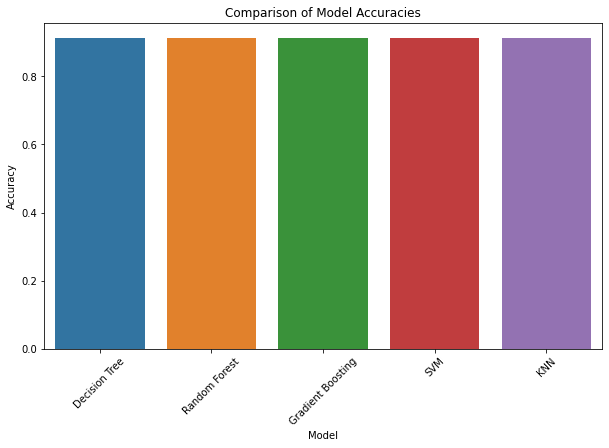

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression  # Replace with your model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Adjust shuffle and random_state as needed

# Empty list to store model scores
model_scores = []
results = {}
models = {

    #'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=50),
    'Random Forest': RandomForestClassifier(max_depth=50),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=50),
    'SVM': SVC(max_iter=50),
    'KNN': KNeighborsClassifier()
}
# Iterate through each fold
for train_index, test_index in kf.split(X_scaled):
    X_trainf, X_testf = X_scaled[train_index], X_scaled[test_index]
    y_trainf, y_testf = y_flat[train_index], y_flat[test_index]
    for name, model in models.items():# Create and train the model
        model.fit(X_trainf, y_trainf)
        score = model.score(X_testf, y_testf)
        model_scores.append(score)
    avg_score=np.mean(model_scores)
    for name, model in models.items():
        results[name] = avg_score


# Step 5: Compare Results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#clustering

Cluster labels: [2 1 1 ... 3 1 4]


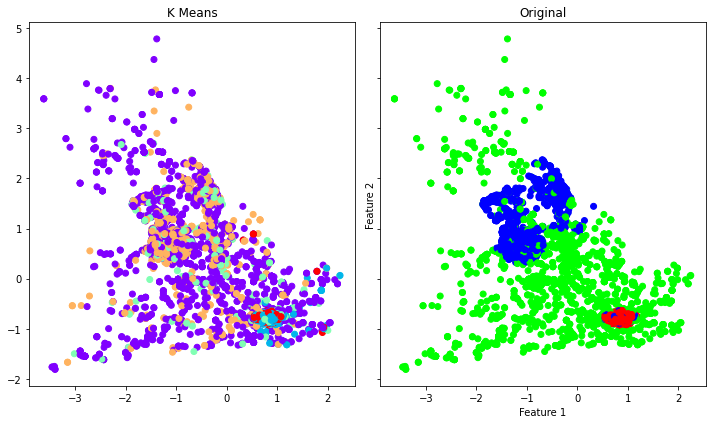

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# (Optional) Get cluster centroids
centroids = kmeans.cluster_centers_

# Print cluster labels
print("Cluster labels:", cluster_labels)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot KMeans clusters
ax1.set_title('K Means')
ax1.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='rainbow')  # Use features directly

# Plot original data points with labels (if available)
ax2.set_title('Original')
if y_train is not None:  # Check if labels exist
    ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
else:
    ax2.scatter(X_train[:, 0], X_train[:, 1], c='gray')  # Use gray for unlabeled data
    ax2.text(0.5, 0.5, 'No labels provided', ha='center', va='center')

# Customize plot (optional)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have performed clustering and have cluster labels stored in cluster_labels

# Add cluster labels as new feature to the dataset
X_train_clustered = np.column_stack((X_train, cluster_labels))


In [ ]:
X_train_clustered

array([[ 0.92731128, -0.72943531,  0.92102402, ..., -0.20482899,
         0.23904224,  2.        ],
       [ 0.59350552, -0.78517827,  0.58992614, ..., -1.08894626,
         0.77502037,  1.        ],
       [ 0.7943459 , -0.78711657,  0.7875    , ...,  1.34237623,
         1.48965788,  1.        ],
       ...,
       [-1.30549773,  0.50212307, -1.3044413 , ...,  0.56877362,
         0.41770162,  3.        ],
       [ 0.8812491 , -0.83136338,  0.87100446, ...,  1.34237623,
         0.596361  ,  1.        ],
       [ 0.54523885, -0.77414999,  0.54281224, ..., -0.09431433,
         1.31099851,  4.        ]])

In [ ]:
# Define the threshold value
threshold = 1000  # Adjust this value based on your specific requirements

# Calculate the cluster label counts
cluster_counts = np.bincount(cluster_labels)

# Identify outliers as data points not belonging to any cluster or belonging to small clusters
outliers = X_train_clustered[np.where((cluster_labels == -1) | (cluster_counts[cluster_labels] < threshold))]



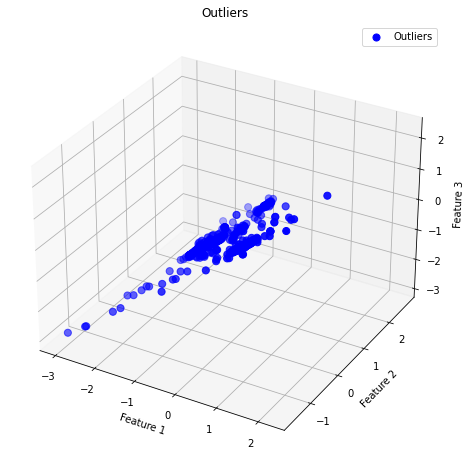

In [ ]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot of the outliers
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot outliers
ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c='blue', marker='o', s=50, label='Outliers')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Outliers')

plt.legend()
plt.show()



Cluster labels: [0 0 0 ... 1 0 2]


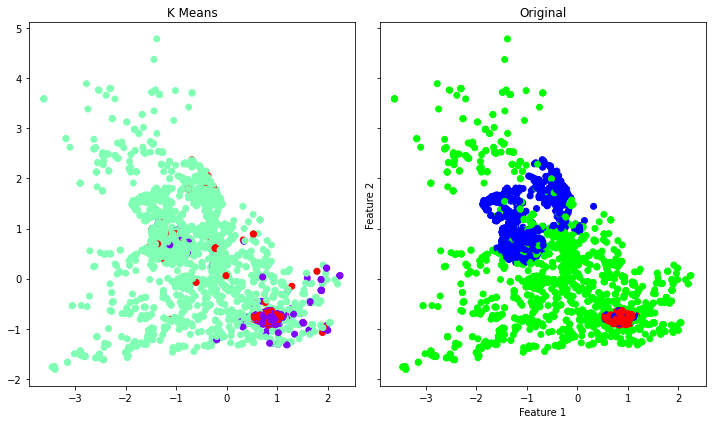

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_

# (Optional) Get cluster centroids
centroids = kmeans.cluster_centers_

# Print cluster labels
print("Cluster labels:", cluster_labels)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot KMeans clusters
ax1.set_title('K Means')
ax1.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='rainbow')  # Use features directly

# Plot original data points with labels (if available)
ax2.set_title('Original')
if y_train is not None:  # Check if labels exist
    ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
else:
    ax2.scatter(X_train[:, 0], X_train[:, 1], c='gray')  # Use gray for unlabeled data
    ax2.text(0.5, 0.5, 'No labels provided', ha='center', va='center')

# Customize plot (optional)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()


Within-Cluster Sum of Squares (WCSS): 512789.7796949982


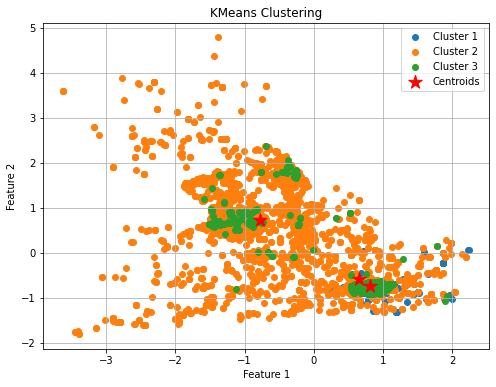

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming you already have fit your KMeans model (kmeans) and have your data points (X_train) with two features (for visualization)

# Calculate WCSS
total_sum_of_squares = 0
for i in range(kmeans.n_clusters):
  # Get data points belonging to cluster i
  cluster_data = X_train[kmeans.labels_ == i]
  # Calculate distance of each point to the centroid of cluster i
  distances = np.linalg.norm(cluster_data - kmeans.cluster_centers_[i], axis=1)  # Euclidean distance
  # Square the distances and sum them for all points in cluster i
  cluster_sum_of_squares = np.sum(distances**2)
  total_sum_of_squares += cluster_sum_of_squares

# Print WCSS
print("Within-Cluster Sum of Squares (WCSS):", total_sum_of_squares)


# Visualization
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
  # Get data points in cluster i
  cluster_data = X_train[kmeans.labels_ == i]
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')  # Assuming features at indices 0 and 1 for visualization

# Plot centroids (optional)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')  # Assuming features at indices 0 and 1

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Assuming you have performed clustering and have cluster labels stored in cluster_labels

# Calculate cluster means
cluster_means = []
for cluster_label in np.unique(cluster_labels):
    cluster_data = X_train[cluster_labels == cluster_label]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

cluster_means = np.array(cluster_means)

# Create a scatter plot of the cluster means
fig = go.Figure(data=go.Scatter3d(
    x=cluster_means[:, 0],
    y=cluster_means[:, 1],
    z=cluster_means[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    title='Cluster Centers'
)

fig.show()


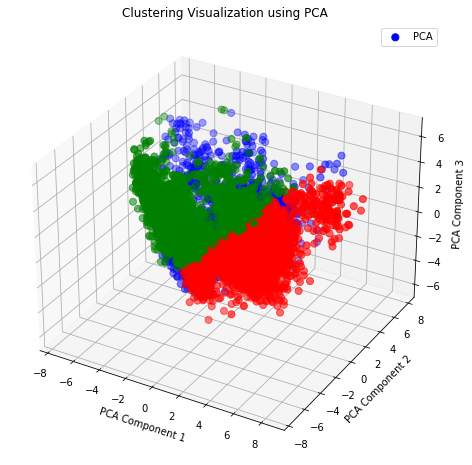

In [ ]:
# Assuming you have performed clustering and have cluster labels stored in cluster_labels

# Visualize clusters using PCA for dimensionality reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate data for each component
pca1 = X_pca[:, 0]
pca2 = X_pca[:, 1]
pca3 = X_pca[:, 2]

# Assign colors based on component values
colors = ['red' if pca1 > pca2 and pca1 > pca3 else  # Red for dominant PCA 1
          'green' if pca2 > pca1 and pca2 > pca3 else 'blue'  # Green for dominant PCA 2
          for pca1, pca2, pca3 in X_pca]

# Create the scatter plot
ax.scatter(pca1, pca3, pca2, c=colors, marker='o', s=50, label='PCA')
#ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], cmap='viridis', marker='o', s=100, label='PCA')

# Set labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Clustering Visualization using PCA')

plt.legend()
plt.show()